In [56]:
import pandas as pd
import numpy as np
from datetime import timedelta

# rajkot data

In [52]:
# Read the Excel file into a DataFrame
df = pd.read_csv('rajkot.csv')

In [53]:
raj=df[['Arrival','MODAL','date_arrival']]


In [54]:
raj

,Arrival,MODAL,date_arrival
0,425.0,7175,14-Oct-23
1,420.0,7200,13-Oct-23
2,480.0,7175,12-Oct-23
3,500.0,7125,11-Oct-23
4,450.0,7200,10-Oct-23
...,...,...,...
3320,550.0,3375,04-Jan-10
3321,500.0,3375,02-Jan-10
3322,610.0,3375,01-Jan-10
3323,938352.4,0,NaN


In [55]:
# Remove duplicates based on 'Column_Name'
raj = raj.drop_duplicates(subset='date_arrival', keep='first')

print(raj)

       Arrival  MODAL date_arrival
0        425.0   7175    14-Oct-23
1        420.0   7200    13-Oct-23
2        480.0   7175    12-Oct-23
3        500.0   7125    11-Oct-23
4        450.0   7200    10-Oct-23
...        ...    ...          ...
3319     560.0   3375    05-Jan-10
3320     550.0   3375    04-Jan-10
3321     500.0   3375    02-Jan-10
3322     610.0   3375    01-Jan-10
3323  938352.4      0          NaN

[3324 rows x 3 columns]


In [56]:

# Count the number of rows where price = 0
count_zero_price = len(raj[raj['MODAL'] == 0]) or len(raj[raj['Arrival'] == 0])

print("Number of rows where price is 0:", count_zero_price)

Number of rows where price is 0: 1


In [57]:
# Drop rows where price is 0
raj = raj[raj['MODAL'] != 0]
raj = raj[raj['Arrival'] != 0]
print(raj)

      Arrival  MODAL date_arrival
0       425.0   7175    14-Oct-23
1       420.0   7200    13-Oct-23
2       480.0   7175    12-Oct-23
3       500.0   7125    11-Oct-23
4       450.0   7200    10-Oct-23
...       ...    ...          ...
3318    600.0   3250    06-Jan-10
3319    560.0   3375    05-Jan-10
3320    550.0   3375    04-Jan-10
3321    500.0   3375    02-Jan-10
3322    610.0   3375    01-Jan-10

[3323 rows x 3 columns]


In [58]:
raj.describe()

,Arrival,MODAL
count,3323.000000,3323.000000
mean,282.381101,5591.316581
std,225.998868,1785.941885
min,0.100000,3250.000000
25%,90.500000,4450.000000
50%,240.000000,5075.000000
75%,425.000000,6002.500000
max,2080.000000,12370.000000


In [59]:
raj.columns = ['rj_arrival', 'rj_price','date']  # Rename the columns

# rolling average

In [60]:
# fill nan values for price of rajkot

In [61]:
raj['date'] = pd.to_datetime(raj['date'])

# Sort the DataFrame by the 'Date' column
raj.sort_values(by='date', inplace=True)

# Generate a list of consecutive dates
start_date = raj['date'].min()
end_date = raj['date'].max()

date_range = pd.date_range(start_date, end_date, freq='D')

# Find missing dates
missing_dates = date_range[~date_range.isin(raj['date'])]

# Create a DataFrame for missing dates with NaN values for 'Price'
missing_df = pd.DataFrame({'date': missing_dates, 'rj_price': np.nan})

# Concatenate the original DataFrame and the missing dates DataFrame
raj = pd.concat([raj, missing_df], ignore_index=True)

# Sort the DataFrame by 'Date' again
raj.sort_values(by='date', inplace=True)


In [62]:
# Define the initial window size for the rolling average calculation
n = 7

# Initialize the null value sum
null_sum = raj['rj_price'].isnull().sum()

# Continue the loop until null value sum is 0
while null_sum > 0:
    # Calculate the rolling average for the 'price_gd' column
    rolling_avg = raj['rj_price'].rolling(window=n, min_periods=1).mean()

    # Fill NaN values in 'price_gd' with the calculated rolling average
    raj['rj_price'] = raj['rj_price'].fillna(rolling_avg)
    
    # Update the null value sum
    null_sum = raj['rj_price'].isnull().sum()

# Print the DataFrame after filling NaN values
print(raj)

# Print the null value sum after filling NaN values (should be 0)
print(raj['rj_price'].isnull().sum())


      rj_arrival  rj_price       date
0          610.0    3375.0 2010-01-01
1          500.0    3375.0 2010-01-02
3323         NaN    3375.0 2010-01-03
2          550.0    3375.0 2010-01-04
3          560.0    3375.0 2010-01-05
...          ...       ...        ...
3318       450.0    7200.0 2023-10-10
3319       500.0    7125.0 2023-10-11
3320       480.0    7175.0 2023-10-12
3321       420.0    7200.0 2023-10-13
3322       425.0    7175.0 2023-10-14

[5035 rows x 3 columns]
0


In [63]:
# fill nan values for arrival of rajkot

In [64]:

date_range = pd.date_range(start_date, end_date, freq='D')

# Find missing dates
missing_dates = date_range[~date_range.isin(raj['date'])]

# Create a DataFrame for missing dates with NaN values for 'Price'
missing_df = pd.DataFrame({'date': missing_dates, 'rj_arrival': np.nan})

# Concatenate the original DataFrame and the missing dates DataFrame
raj = pd.concat([raj, missing_df], ignore_index=True)

# Sort the DataFrame by 'Date' again
raj.sort_values(by='date', inplace=True)


In [65]:
raj

,rj_arrival,rj_price,date
0,610.0,3375.0,2010-01-01
1,500.0,3375.0,2010-01-02
2,NaN,3375.0,2010-01-03
3,550.0,3375.0,2010-01-04
4,560.0,3375.0,2010-01-05
...,...,...,...
5030,450.0,7200.0,2023-10-10
5031,500.0,7125.0,2023-10-11
5032,480.0,7175.0,2023-10-12
5033,420.0,7200.0,2023-10-13


In [66]:
# Define the initial window size for the rolling average calculation
n = 7

# Initialize the null value sum
null_sum = raj['rj_arrival'].isnull().sum()

# Continue the loop until null value sum is 0
while null_sum > 0:
    # Calculate the rolling average for the 'price_gd' column
    rolling_avg = raj['rj_arrival'].rolling(window=n, min_periods=1).mean()

    # Fill NaN values in 'price_gd' with the calculated rolling average
    raj['rj_arrival'] = raj['rj_arrival'].fillna(rolling_avg)
    
    # Update the null value sum
    null_sum = raj['rj_arrival'].isnull().sum()

# Print the DataFrame after filling NaN values
print(raj)

# Print the null value sum after filling NaN values (should be 0)
print(raj['rj_arrival'].isnull().sum())

      rj_arrival  rj_price       date
0          610.0    3375.0 2010-01-01
1          500.0    3375.0 2010-01-02
2          555.0    3375.0 2010-01-03
3          550.0    3375.0 2010-01-04
4          560.0    3375.0 2010-01-05
...          ...       ...        ...
5030       450.0    7200.0 2023-10-10
5031       500.0    7125.0 2023-10-11
5032       480.0    7175.0 2023-10-12
5033       420.0    7200.0 2023-10-13
5034       425.0    7175.0 2023-10-14

[5035 rows x 3 columns]
0


# karnataka data

In [476]:
# Read the Excel file into a DataFrame
df1 = pd.read_csv('karnataka.csv')

In [477]:
kar=df1[['Arrival','MODAL','date_arrival']]
kar

,Arrival,MODAL,date_arrival
0,117,6856,12-Oct-23
1,202,6840,09-Oct-23
2,201,6865,05-Oct-23
3,179,7055,02-Oct-23
4,134,7238,28-Sep-23
...,...,...,...
2731,635,4176,04-Jan-10
2732,635,3176,04-Jan-10
2733,47,3079,01-Jan-10
2734,858706,0,NaN


In [478]:
# Remove duplicates based on 'Column_Name'
kar = kar.drop_duplicates(subset='date_arrival', keep='first')

print(kar)

      Arrival  MODAL date_arrival
0         117   6856    12-Oct-23
1         202   6840    09-Oct-23
2         201   6865    05-Oct-23
3         179   7055    02-Oct-23
4         134   7238    28-Sep-23
...       ...    ...          ...
2728       19   3096    08-Jan-10
2729       84   3222    07-Jan-10
2731      635   4176    04-Jan-10
2733       47   3079    01-Jan-10
2734   858706      0          NaN

[2081 rows x 3 columns]


In [70]:
# Count the number of rows where price = 0
count_zero_price = len(kar[kar['MODAL'] == 0]) or len(kar[kar['Arrival'] == 0])

print("Number of rows where price is 0:", count_zero_price)

Number of rows where price is 0: 2


In [71]:
# Drop rows where price is 0
kar = kar[kar['MODAL'] != 0]
kar = kar[kar['Arrival'] != 0]
print(kar)

      Arrival  MODAL date_arrival
0         117   6856    12-Oct-23
1         202   6840    09-Oct-23
2         201   6865    05-Oct-23
3         179   7055    02-Oct-23
4         134   7238    28-Sep-23
...       ...    ...          ...
2727      750   3196    11-Jan-10
2728       19   3096    08-Jan-10
2729       84   3222    07-Jan-10
2731      635   4176    04-Jan-10
2733       47   3079    01-Jan-10

[2079 rows x 3 columns]


In [72]:
kar.describe()

,Arrival,MODAL
count,2079.000000,2079.000000
mean,246.478595,5179.240019
std,504.525063,1771.534760
min,1.000000,800.000000
25%,14.000000,4068.500000
50%,85.000000,4809.000000
75%,306.500000,5589.000000
max,9167.000000,15100.000000


In [73]:
kar.columns = ['tl_arrival', 'tl_price','date']  # Rename the columns

# rolling avg

In [74]:
kar['date'] = pd.to_datetime(kar['date'])

# Sort the DataFrame by the 'Date' column
kar.sort_values(by='date', inplace=True)

# Generate a list of consecutive dates
start_date = kar['date'].min()
end_date = kar['date'].max()

date_range = pd.date_range(start_date, end_date, freq='D')

# Find missing dates
missing_dates = date_range[~date_range.isin(kar['date'])]

# Create a DataFrame for missing dates with NaN values for 'Price'
missing_df = pd.DataFrame({'date': missing_dates, 'tl_price': np.nan ,'tl_arrival' : np.nan})

# Concatenate the original DataFrame and the missing dates DataFrame
kar = pd.concat([kar, missing_df], ignore_index=True)

# Sort the DataFrame by 'Date' again
kar= kar.sort_values(by='date')

In [75]:
kar

,tl_arrival,tl_price,date
0,47.0,3079.0,2010-01-01
2079,NaN,NaN,2010-01-02
2080,NaN,NaN,2010-01-03
1,635.0,4176.0,2010-01-04
2081,NaN,NaN,2010-01-05
...,...,...,...
5030,NaN,NaN,2023-10-08
2077,202.0,6840.0,2023-10-09
5031,NaN,NaN,2023-10-10
5032,NaN,NaN,2023-10-11


In [76]:
# Define the initial window size for the rolling average calculation
n = 7

# Initialize the null value sum
null_sum = kar['tl_price'].isnull().sum()

# Continue the loop until null value sum is 0
while null_sum > 0:
    # Calculate the rolling average for the 'price_gd' column
    rolling_avg = kar['tl_price'].rolling(window=n, min_periods=1).mean()

    # Fill NaN values in 'price_gd' with the calculated rolling average
    kar['tl_price'] = kar['tl_price'].fillna(rolling_avg)
    
    # Update the null value sum
    null_sum = kar['tl_price'].isnull().sum()

# Print the DataFrame after filling NaN values
print(kar)

# Print the null value sum after filling NaN values (should be 0)
print(kar['tl_price'].isnull().sum())

      tl_arrival  tl_price       date
0           47.0    3079.0 2010-01-01
2079         NaN    3079.0 2010-01-02
2080         NaN    3079.0 2010-01-03
1          635.0    4176.0 2010-01-04
2081         NaN    3627.5 2010-01-05
...          ...       ...        ...
5030         NaN    6960.0 2023-10-08
2077       202.0    6840.0 2023-10-09
5031         NaN    6852.5 2023-10-10
5032         NaN    6852.5 2023-10-11
2078       117.0    6856.0 2023-10-12

[5033 rows x 3 columns]
0


In [77]:
# Define the initial window size for the rolling average calculation
n = 7

# Initialize the null value sum
null_sum = kar['tl_arrival'].isnull().sum()

# Continue the loop until null value sum is 0
while null_sum > 0:
    # Calculate the rolling average for the 'price_gd' column
    rolling_avg = kar['tl_arrival'].rolling(window=n, min_periods=1).mean()

    # Fill NaN values in 'price_gd' with the calculated rolling average
    kar['tl_arrival'] = kar['tl_arrival'].fillna(rolling_avg)
    
    # Update the null value sum
    null_sum = kar['tl_arrival'].isnull().sum()
# Print the DataFrame after filling NaN values
print(kar)

# Print the null value sum after filling NaN values (should be 0)
print(kar['tl_arrival'].isnull().sum())

      tl_arrival  tl_price       date
0           47.0    3079.0 2010-01-01
2079        47.0    3079.0 2010-01-02
2080        47.0    3079.0 2010-01-03
1          635.0    4176.0 2010-01-04
2081       341.0    3627.5 2010-01-05
...          ...       ...        ...
5030       190.0    6960.0 2023-10-08
2077       202.0    6840.0 2023-10-09
5031       201.5    6852.5 2023-10-10
5032       201.5    6852.5 2023-10-11
2078       117.0    6856.0 2023-10-12

[5033 rows x 3 columns]
0


In [78]:
kar.columns = ['kr_arrival', 'kr_price','date']

In [79]:
# Merge based on the 'ID' column
merged_df = pd.merge(raj, kar, on='date')

print(merged_df)


      rj_arrival  rj_price       date  kr_arrival  kr_price
0          610.0    3375.0 2010-01-01        47.0    3079.0
1          500.0    3375.0 2010-01-02        47.0    3079.0
2          555.0    3375.0 2010-01-03        47.0    3079.0
3          550.0    3375.0 2010-01-04       635.0    4176.0
4          560.0    3375.0 2010-01-05       341.0    3627.5
...          ...       ...        ...         ...       ...
5028       368.0    7230.0 2023-10-08       190.0    6960.0
5029       500.0    7100.0 2023-10-09       202.0    6840.0
5030       450.0    7200.0 2023-10-10       201.5    6852.5
5031       500.0    7125.0 2023-10-11       201.5    6852.5
5032       480.0    7175.0 2023-10-12       117.0    6856.0

[5033 rows x 5 columns]


In [80]:
merged_df.to_csv('cotton.csv', index=False)

In [444]:
df=pd.read_csv("cotton.csv")

# VAR MODEL

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [4]:
macro_data = pd.read_csv('cotton.csv', parse_dates=['date'], index_col='date')
print(macro_data.shape)  
macro_data.head()

(5033, 4)


,rj_arrival,rj_price,kr_arrival,kr_price
date,,,,
2010-01-01,610.0,3375.0,47.0,3079.0
2010-01-02,500.0,3375.0,47.0,3079.0
2010-01-03,555.0,3375.0,47.0,3079.0
2010-01-04,550.0,3375.0,635.0,4176.0
2010-01-05,560.0,3375.0,341.0,3627.5


In [5]:
ad_fuller_result_1 = adfuller(macro_data['rj_price'].diff()[1:])

print('rajkot')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_data['kr_price'].diff()[1:])

print('karnataka')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')
print('\n---------------------\n')

rajkot
ADF Statistic: -14.989247972243106
p-value: 1.1317461638152227e-27

---------------------

karnataka
ADF Statistic: -14.838479506258889
p-value: 1.8526639434350173e-27

---------------------



In [6]:
import datetime as dt

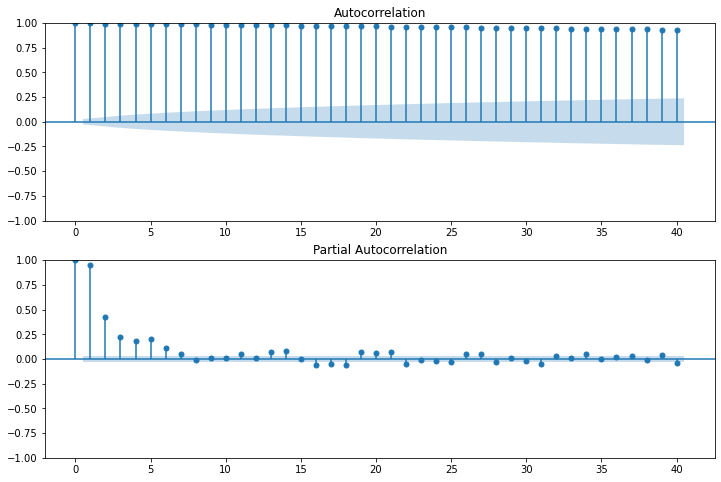

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(macro_data['rj_price'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(macro_data['kr_price'], lags=40, ax=ax2)
plt.show()

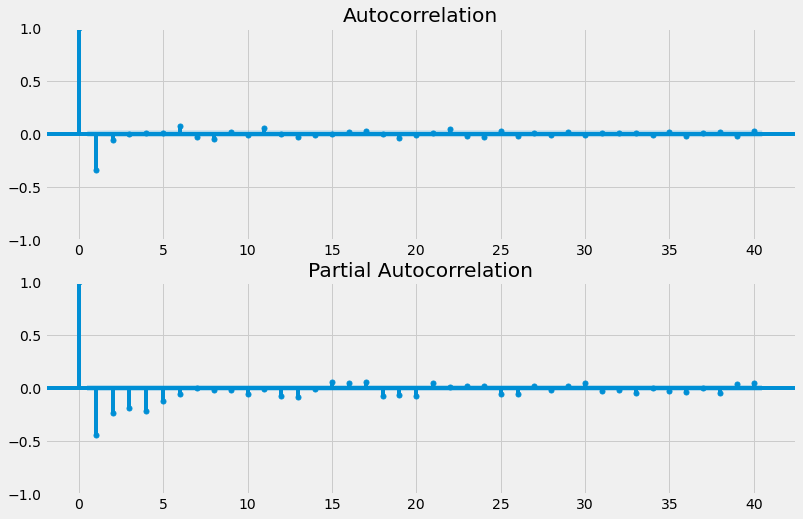

In [8]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#Plots with first order differenced Sales variable
fig = sm.graphics.tsa.plot_acf(macro_data['rj_price'].diff().dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(macro_data['kr_price'].diff().dropna(), lags=40, ax=ax2)
plt.show()

In [9]:
print('price_gd causes price_rj?\n')
print('------------------')
granger_1 = grangercausalitytests(macro_data[['rj_price', 'kr_price']], 4)#4 for 4 months

print('\price_rj causes price_gd?\n')
print('------------------')
granger_2 = grangercausalitytests(macro_data[['rj_price', 'kr_price']], 4)#ulc independent

price_gd causes price_rj?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=65.8742 , p=0.0000  , df_denom=5029, df_num=1
ssr based chi2 test:   chi2=65.9135 , p=0.0000  , df=1
likelihood ratio test: chi2=65.4856 , p=0.0000  , df=1
parameter F test:         F=65.8742 , p=0.0000  , df_denom=5029, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=18.2731 , p=0.0000  , df_denom=5026, df_num=2
ssr based chi2 test:   chi2=36.5826 , p=0.0000  , df=2
likelihood ratio test: chi2=36.4503 , p=0.0000  , df=2
parameter F test:         F=18.2731 , p=0.0000  , df_denom=5026, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=8.6346  , p=0.0000  , df_denom=5023, df_num=3
ssr based chi2 test:   chi2=25.9400 , p=0.0000  , df=3
likelihood ratio test: chi2=25.8734 , p=0.0000  , df=3
parameter F test:         F=8.6346  , p=0.0000  , df_denom=5023, df_num=3

Granger Causality
number of lags (no zero

In [29]:
macro_data = macro_data[['rj_price', 'kr_price']]
print(macro_data.shape)

(5033, 2)


In [30]:
from statsmodels.tsa.statespace.varmax import VARMAX
train_df=macro_data[:-1510]
test_df=macro_data[-1510:]
# Train VARMAX model on the training data
var_model = VARMAX(train_df, order=(2,1), enforce_stationarity=True )
fitted_model = var_model.fit(disp=False)
fitted_model.summary()

Dep. Variable:,"['rj_price', 'kr_price']",No. Observations:,3523
Model:,"VARMA(2,1)",Log Likelihood,-47059.803
,+ intercept,AIC,94153.605
Date:,"Wed, 18 Oct 2023",BIC,94258.445
Time:,18:38:15,HQIC,94191.009
Sample:,01-01-2010,,
,- 08-24-2019,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.00, 0.03",Jarque-Bera (JB):,"24998.86, 260201.30"
Prob(Q):,"1.00, 0.87",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"1.18, 1.86",Skew:,"-0.58, -2.13"


In [31]:
# Make predictions for the test data
start_idx = test_df.index.min()# You can adjust the start index based on your data
end_idx = test_df.index.max() # Assuming n_forecast is defined somewhere in your code
predict = fitted_model.get_prediction(start=start_idx, end=end_idx)
predictions = predict.predicted_mean
train_predictions = fitted_model.predict(start=0, end=len(train_df)-1)
predictions.columns = ['predicted_rj', 'predicted_kr']
train_predictions.columns = ['predicted_rj', 'predicted_kr']

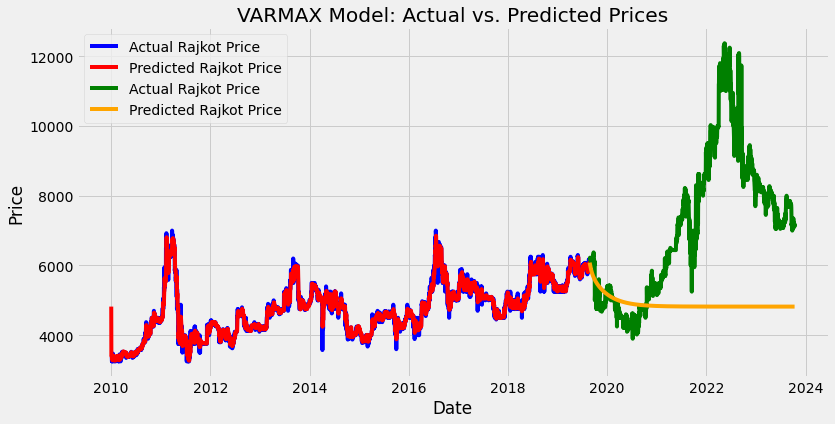

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(train_df.index, train_df['rj_price'], label='Actual Rajkot Price', color='blue')
plt.plot(train_df.index, train_predictions['predicted_rj'], label='Predicted Rajkot Price', color='red')
plt.plot(test_df.index, test_df['rj_price'], label='Actual Rajkot Price', color='green')
plt.plot(test_df.index, predictions['predicted_rj'], label='Predicted Rajkot Price', color='orange')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('VARMAX Model: Actual vs. Predicted Prices')
plt.grid(True)
plt.show()


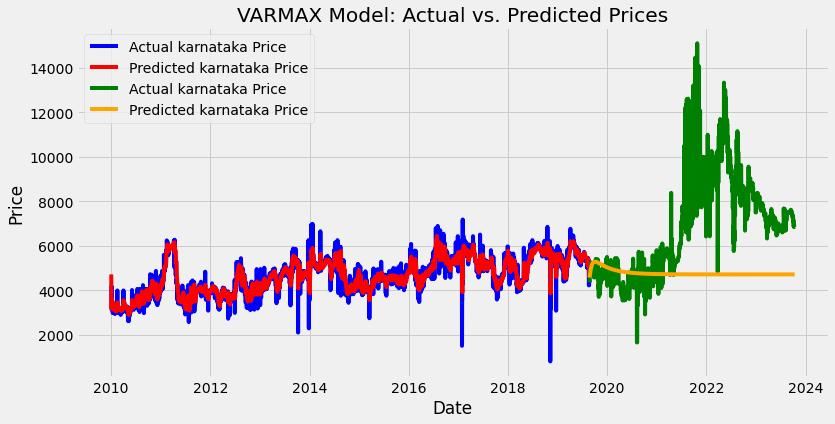

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(train_df.index, train_df['kr_price'], label='Actual karnataka Price', color='blue')
plt.plot(train_df.index, train_predictions['predicted_kr'], label='Predicted karnataka Price', color='red')
plt.plot(test_df.index, test_df['kr_price'], label='Actual karnataka Price', color='green')
plt.plot(test_df.index, predictions['predicted_kr'], label='Predicted karnataka Price', color='orange')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('VARMAX Model: Actual vs. Predicted Prices')
plt.show()

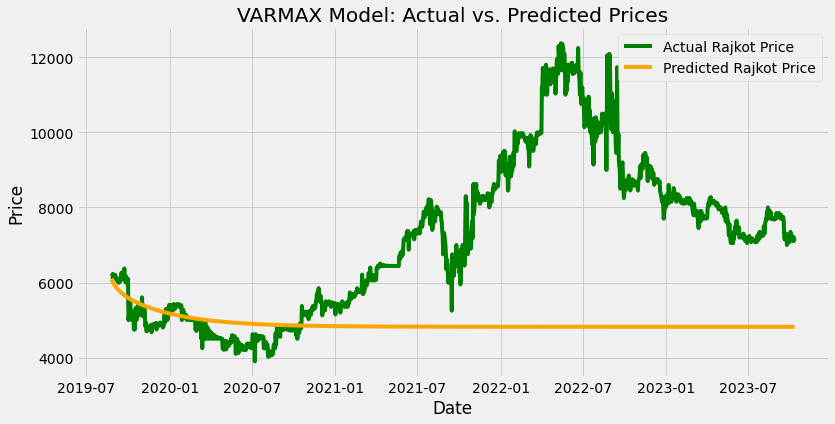

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(test_df.index, test_df['rj_price'], label='Actual Rajkot Price', color='green')
plt.plot(test_df.index, predictions['predicted_rj'], label='Predicted Rajkot Price', color='orange')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('VARMAX Model: Actual vs. Predicted Prices')
plt.show()


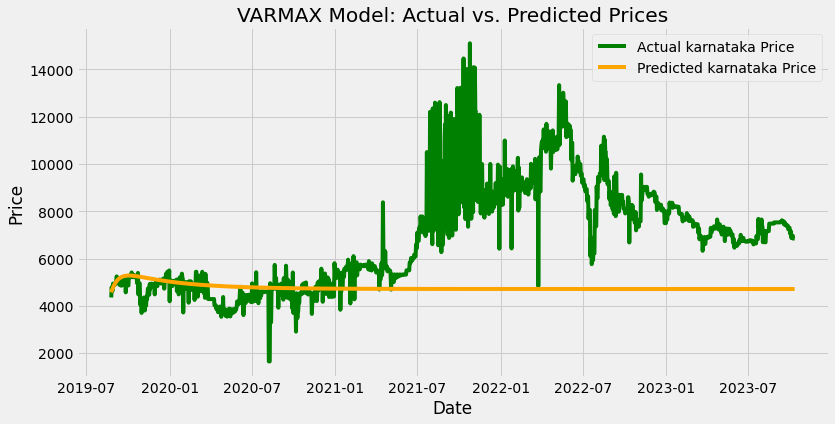

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(test_df.index, test_df['kr_price'], label='Actual karnataka Price', color='green')
plt.plot(test_df.index, predictions['predicted_kr'], label='Predicted karnataka Price', color='orange')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('VARMAX Model: Actual vs. Predicted Prices')
plt.show()


In [17]:
from sklearn.metrics import mean_squared_error
y_true = test_df['rj_price']
y_pred = predictions['predicted_rj']

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print("MSE",mse)
print("RMSE",rmse)

# # Calculate the range of the target variable
# y_range = np.max(y_true) - np.min(y_true)

# # Calculate the RMSE as a percentage of the range
# rmse_percentage = (rmse / y_range) * 100

# print(f'Root Mean Squared Error (RMSE) as a percentage of the range: {rmse_percentage:.2f}%')

MSE 9774150.680933118
RMSE 3126.3638113522743


# ARIMA

                               SARIMAX Results                                
Dep. Variable:               rj_price   No. Observations:                 3523
Model:                 ARIMA(2, 3, 6)   Log Likelihood              -21983.149
Date:                Wed, 18 Oct 2023   AIC                          43984.298
Time:                        18:26:55   BIC                          44039.794
Sample:                    01-01-2010   HQIC                         44004.098
                         - 08-24-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9608      0.001  -2349.315      0.000      -1.962      -1.959
ar.L2         -0.9999      0.001  -1156.100      0.000      -1.002      -0.998
ma.L1         -0.5465      0.042    -13.108      0.0

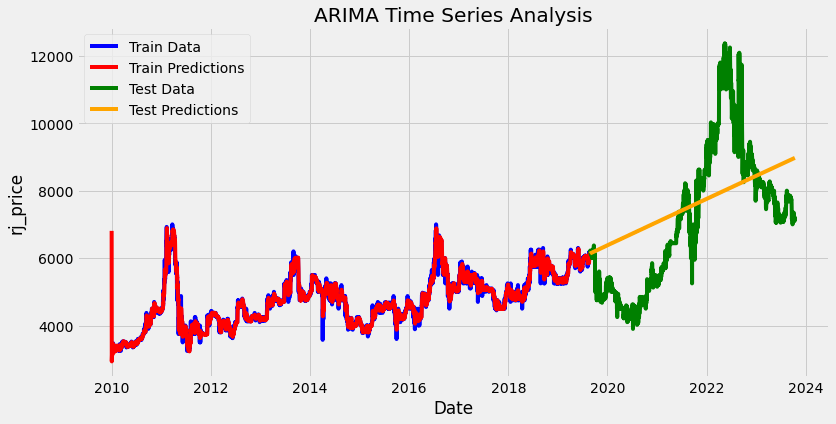

MSE 2772881.6779732457
RMSE 1665.197188915849


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your dataset
df = pd.read_csv('cotton.csv', parse_dates=['date'], index_col='date')
df = df[['rj_price']]

# Split the data into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(df) * 0.7)
train_data = df[:train_size]
test_data = df[train_size:]

# Define the p, d, and q parameters for the ARIMA model
p, d, q = 2, 3, 6  # Example values, adjust based on your data and analysis

# Create and fit the ARIMA model
model = ARIMA(train_data['rj_price'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())
# Make predictions on the test data
train_predictions = model_fit.predict(start=1, end=len(train_data), typ='levels')
test_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['rj_price'], label='Train Data', color='blue')
plt.plot(train_predictions.index, train_predictions,label='Train Predictions', color='red')
plt.plot(test_data.index, test_data['rj_price'], label='Test Data', color='green')
plt.plot(test_predictions.index, test_predictions, label='Test Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('rj_price')
plt.legend()
plt.title('ARIMA Time Series Analysis')
plt.show()

from sklearn.metrics import mean_squared_error
from math import sqrt

y_true = test_data['rj_price']
y_pred = test_predictions

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print("MSE",mse)
print("RMSE",rmse)
# # Calculate the range of the target variable
# y_range = np.max(y_true) - np.min(y_true)

# # Calculate the RMSE as a percentage of the range
# rmse_percentage = (rmse / y_range) * 100
# print("rmse percentage",rmse_percentage)


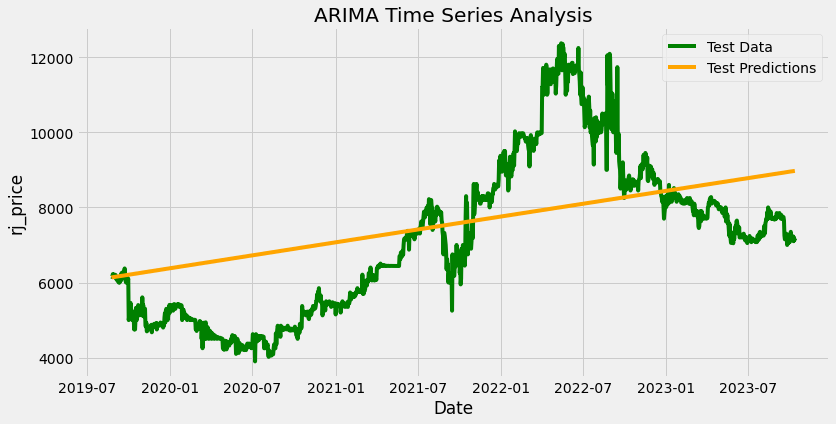

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['rj_price'], label='Test Data', color='green')
plt.plot(test_predictions.index, test_predictions, label='Test Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('rj_price')
plt.legend()
plt.title('ARIMA Time Series Analysis')
plt.show()

# ARIMAX

                               SARIMAX Results                                
Dep. Variable:               rj_price   No. Observations:                 3523
Model:                 ARIMA(2, 3, 6)   Log Likelihood              -22002.035
Date:                Wed, 18 Oct 2023   AIC                          44024.071
Time:                        18:27:20   BIC                          44085.733
Sample:                    01-01-2010   HQIC                         44046.071
                         - 08-24-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
rj_arrival    -0.0140      0.021     -0.661      0.508      -0.056       0.028
ar.L1         -1.9088      0.009   -204.297      0.000      -1.927      -1.891
ar.L2         -0.9995      0.010   -104.539      0.0

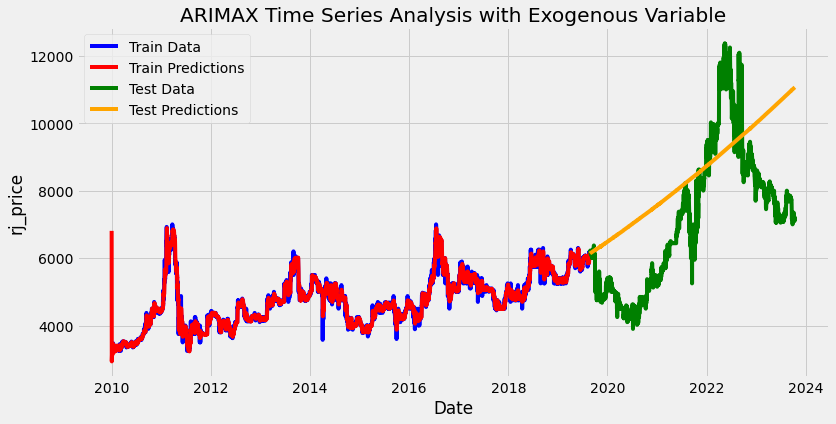

MSE 3986033.3927569743
RMSE 1996.505294948394


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your dataset
df = pd.read_csv('cotton.csv', parse_dates=['date'], index_col='date')
df = df[['rj_price', 'rj_arrival']]  # Replace 'exogenous_variable' with the actual column name of your exogenous variable

# Split the data into training and testing sets (e.g., 70% train, 30% test)
train_size = int(len(df) * 0.7)
train_data = df[:train_size]
test_data = df[train_size:]

# Define the p, d, and q parameters for the ARIMA model
p, d, q = 2, 3, 6  # Example values, adjust based on your data and analysis

# Create and fit the ARIMAX model with exogenous variable
model = ARIMA(train_data['rj_price'], exog=train_data[['rj_arrival']], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())
# Make predictions on the test data
test_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1,
                                     exog=test_data[['rj_arrival']], typ='levels')

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['rj_price'], label='Train Data', color='blue')
plt.plot(train_predictions.index, train_predictions,label='Train Predictions', color='red')
plt.plot(test_data.index, test_data['rj_price'], label='Test Data', color='green')
plt.plot(test_predictions.index, test_predictions, label='Test Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('rj_price')
plt.legend()
plt.title('ARIMAX Time Series Analysis with Exogenous Variable')
plt.show()

# Calculate RMSE as a percentage of the range
y_true = test_data['rj_price']
y_pred = test_predictions

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print("MSE",mse)
print("RMSE",rmse)
# # Calculate the range of the target variable
# y_range = np.max(y_true) - np.min(y_true)

# # Calculate the RMSE as a percentage of the range
# rmse_percentage = (rmse / y_range) * 100
# print('RMSE Percentage:', rmse_percentage)


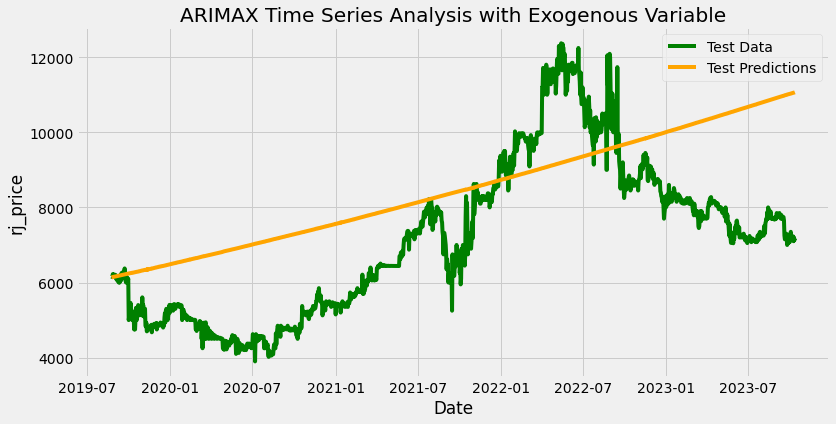

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['rj_price'], label='Test Data', color='green')
plt.plot(test_predictions.index, test_predictions, label='Test Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('rj_price')
plt.legend()
plt.title('ARIMAX Time Series Analysis with Exogenous Variable')
plt.show()

# ARCH

In [1]:
import datetime as dt
from arch import arch_model
import statsmodels.api as sm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your data (replace 'cotton.csv' with your actual data file)
df = pd.read_csv('cotton.csv') 
df = df[['rj_price', 'date']]
df.set_index('date', inplace=True)  # Set 'date' as the index
train_size = int(len(df) * 0.7)
train_data = df[:train_size]
test_data = df[train_size:]

# Create the ARCH model
model = arch_model(train_data['rj_price'], mean='ZERO', lags=1, vol='arch', p=1, o=0, q=1)

# Fit the model with train_data
model_fit = model.fit(disp='off')
print(model_fit.summary())

train_prediction = model_fit.conditional_volatility

forecast = model_fit.forecast(horizon=len(test_data))

forecasted_volatility = np.sqrt(forecast.variance.values[-1, :])

# Calculate RMSE as a percentage of the range
y_true = test_data['rj_price']
y_pred = forecasted_volatility # Select forecasted values corresponding to test data dates

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print("MSE",mse)
print("RMSE",rmse)



                        Zero Mean - ARCH Model Results                        
Dep. Variable:               rj_price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -34782.8
Distribution:                  Normal   AIC:                           69569.6
Method:            Maximum Likelihood   BIC:                           69581.9
                                        No. Observations:                 3523
Date:                Thu, Oct 19 2023   Df Residuals:                     3523
Time:                        14:03:17   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      5.9250e+04  7.105e+04      0.834      0.404 

C:\Users\dell\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.925e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


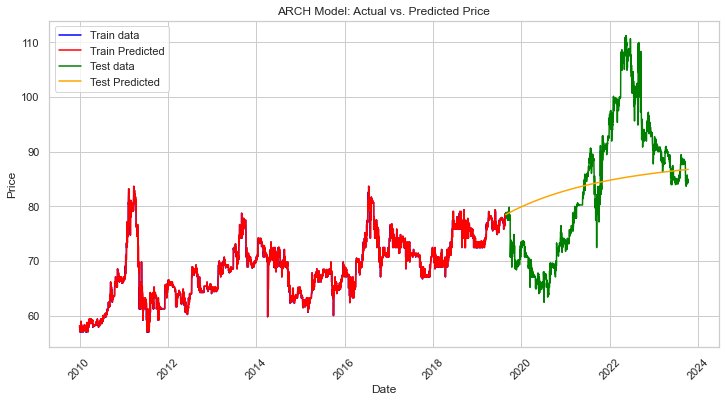

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Set the Seaborn style
sns.set(style="whitegrid")

# Assuming train_data.index and test_data.index are datetime objects
# Convert the dates to a format suitable for plotting
train_dates = [datetime.datetime.strptime(d, "%Y-%m-%d") for d in train_data.index]
test_dates = [datetime.datetime.strptime(d, "%Y-%m-%d") for d in test_data.index]

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot actual and predicted volatilities for the train and test data
sns.lineplot(x=train_dates, y=np.sqrt(train_data['rj_price']), label='Train data', color='blue')
sns.lineplot(x=train_dates, y=np.sqrt(train_prediction), label='Train Predicted', color='red')
sns.lineplot(x=test_dates, y=np.sqrt(y_true), label='Test data', color='green')
sns.lineplot(x=test_dates, y=np.sqrt(y_pred), label='Test Predicted', color='orange')

# Set axis labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('ARCH Model: Actual vs. Predicted Price')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# # Show the plot
plt.show()

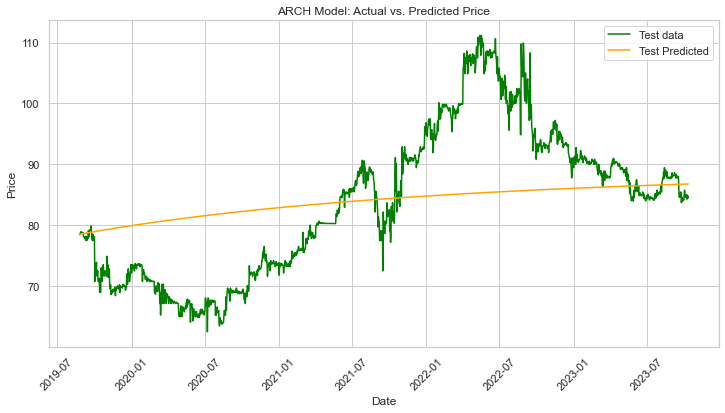

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Set the Seaborn style
sns.set(style="whitegrid")

# Assuming train_data.index and test_data.index are datetime objects
# Convert the dates to a format suitable for plotting
train_dates = [datetime.datetime.strptime(d, "%Y-%m-%d") for d in train_data.index]
test_dates = [datetime.datetime.strptime(d, "%Y-%m-%d") for d in test_data.index]

# Create a figure and axis
plt.figure(figsize=(12, 6))

sns.lineplot(x=test_dates, y=np.sqrt(y_true), label='Test data', color='green')
sns.lineplot(x=test_dates, y=np.sqrt(y_pred), label='Test Predicted', color='orange')

# Set axis labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('ARCH Model: Actual vs. Predicted Price')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# # Show the plot
plt.show()


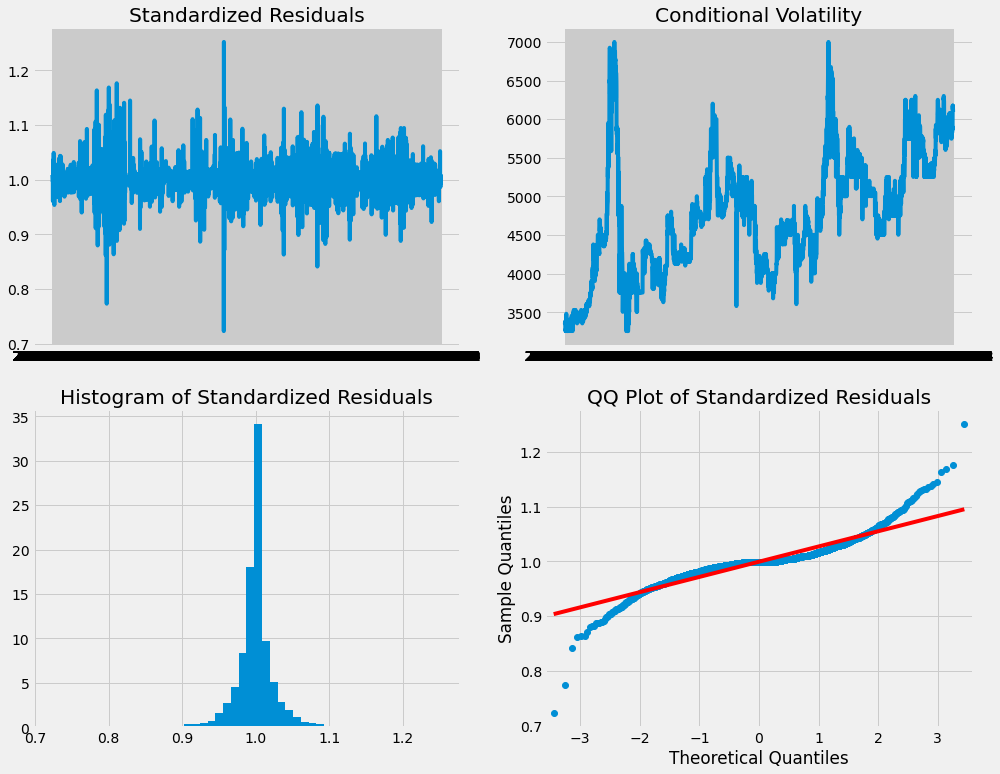

In [38]:
import statsmodels.api as sm
std_residuals = model_fit.resid / model_fit.conditional_volatility
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
plt.plot(std_residuals)
plt.title('Standardized Residuals')
plt.subplot(2, 2, 2)
plt.plot(model_fit.conditional_volatility)
plt.title('Conditional Volatility')
plt.subplot(2, 2, 3)
plt.hist(std_residuals, bins=50, density=True)
plt.title('Histogram of Standardized Residuals')
plt.subplot(2, 2, 4)
sm.qqplot(std_residuals, line='s', ax=plt.gca())
plt.title('QQ Plot of Standardized Residuals')
plt.show()

# ARCHX

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your data (replace 'cotton.csv' with your actual data file)
df = pd.read_csv('cotton.csv') 
df = df[['rj_price', 'rj_arrival', 'date']]
df.set_index('date', inplace=True)  # Set 'date' as the index

# Split the data into training and testing sets
train_size = int(len(df) * 0.73)
train_data = df[:train_size]
test_data = df[train_size:]
# Create the GARCH model with an exogenous variable
model = arch_model(y=train_data['rj_price'], x=train_data['rj_arrival'], mean='ZERO', lags=2, vol='arch', p=1,o=0, q=0)

# Fit the model
model_fit = model.fit(disp='off')
print(model_fit.summary())

train_prediction = model_fit.conditional_volatility
forecast = model_fit.forecast(horizon=len(test_data['rj_price']))

forecasted_volatility = np.sqrt(forecast.variance.values[-1, :])

# Calculate RMSE as a percentage of the range
y_true = test_data['rj_price']
y_pred = forecasted_volatility # Select forecasted values corresponding to test data dates

y_true = test_data['rj_price']
# Select forecasted volatilities corresponding to test data dates
y_pred = forecasted_volatility

# Calculate RMSE as a percentage of the range
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print("MSE",mse)
print("RMSE",rmse)




                        Zero Mean - ARCH Model Results                        
Dep. Variable:               rj_price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -36292.9
Distribution:                  Normal   AIC:                           72589.8
Method:            Maximum Likelihood   BIC:                           72602.3
                                        No. Observations:                 3674
Date:                Thu, Oct 19 2023   Df Residuals:                     3674
Time:                        14:11:44   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      5.9263e+04  5.939e+04      0.998      0.318 

C:\Users\dell\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.926e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


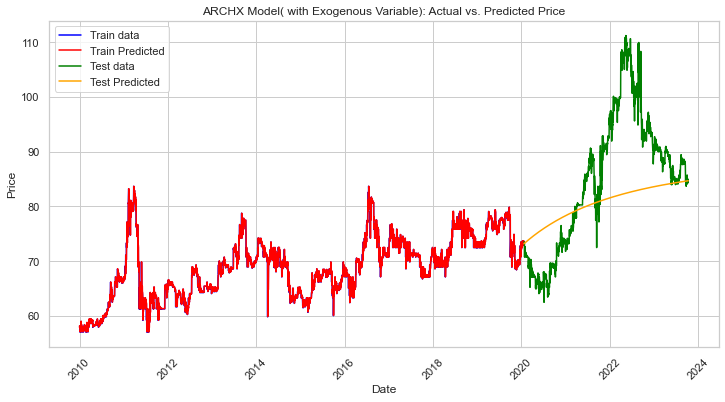

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Set the Seaborn style
sns.set(style="whitegrid")

# Assuming train_data.index and test_data.index are datetime objects
# Convert the dates to a format suitable for plotting
train_dates = [datetime.datetime.strptime(d, "%Y-%m-%d") for d in train_data.index]
test_dates = [datetime.datetime.strptime(d, "%Y-%m-%d") for d in test_data.index]

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot actual and predicted volatilities for the train and test data
sns.lineplot(x=train_dates, y=np.sqrt(train_data['rj_price']), label='Train data', color='blue')
sns.lineplot(x=train_dates, y=np.sqrt(train_prediction), label='Train Predicted', color='red')
sns.lineplot(x=test_dates, y=np.sqrt(y_true), label='Test data', color='green')
sns.lineplot(x=test_dates, y=np.sqrt(y_pred), label='Test Predicted', color='orange')

# Set axis labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('ARCHX Model( with Exogenous Variable): Actual vs. Predicted Price')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# # Show the plot
plt.show()

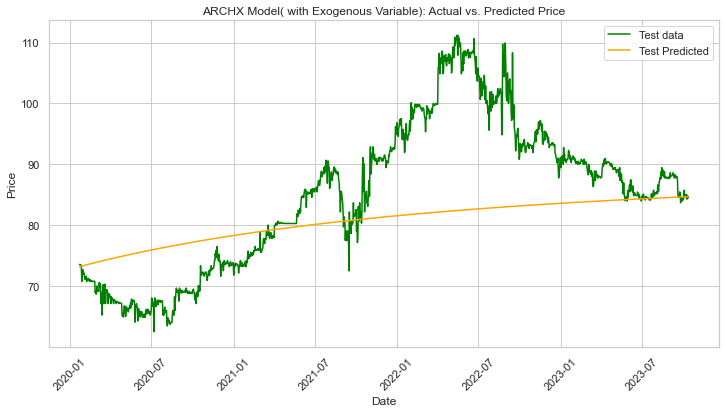

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Set the Seaborn style
sns.set(style="whitegrid")

# Assuming train_data.index and test_data.index are datetime objects
# Convert the dates to a format suitable for plotting

test_dates = [datetime.datetime.strptime(d, "%Y-%m-%d") for d in test_data.index]

# Create a figure and axis
plt.figure(figsize=(12, 6))

sns.lineplot(x=test_dates, y=np.sqrt(y_true), label='Test data', color='green')
sns.lineplot(x=test_dates, y=np.sqrt(y_pred), label='Test Predicted', color='orange')

# Set axis labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('ARCHX Model( with Exogenous Variable): Actual vs. Predicted Price')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# # Show the plot
plt.show()

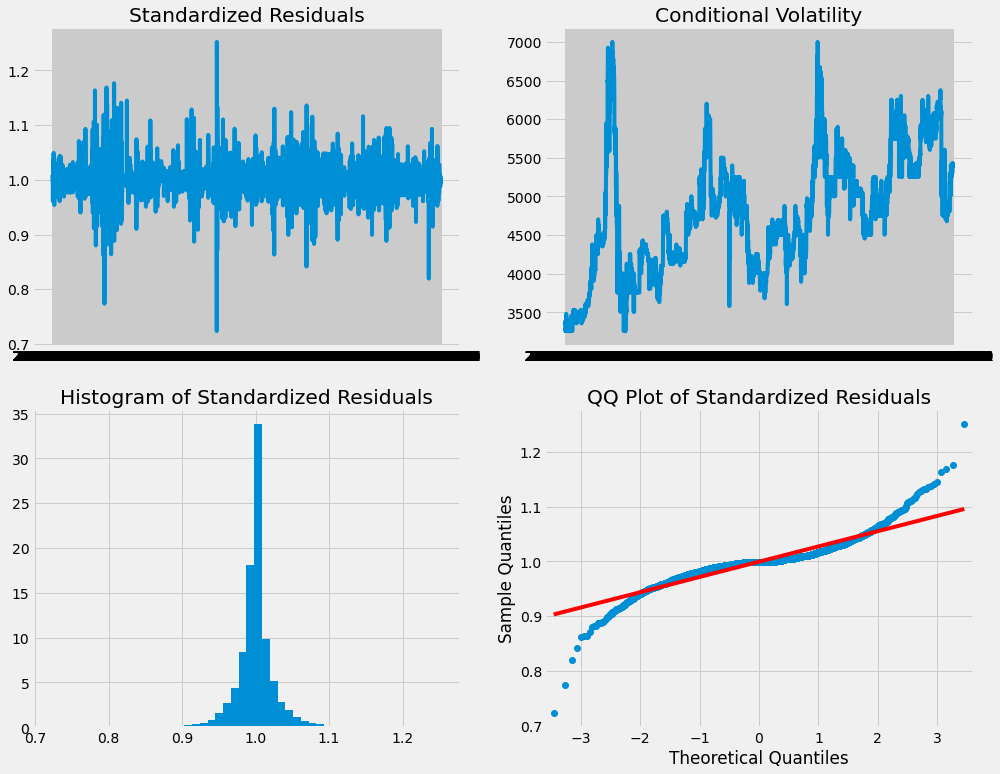

In [28]:
import statsmodels.api as sm
std_residuals = model_fit.resid / model_fit.conditional_volatility
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
plt.plot(std_residuals)
plt.title('Standardized Residuals')
plt.subplot(2, 2, 2)
plt.plot(model_fit.conditional_volatility)
plt.title('Conditional Volatility')
plt.subplot(2, 2, 3)
plt.hist(std_residuals, bins=50, density=True)
plt.title('Histogram of Standardized Residuals')
plt.subplot(2, 2, 4)
sm.qqplot(std_residuals, line='s', ax=plt.gca())
plt.title('QQ Plot of Standardized Residuals')
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

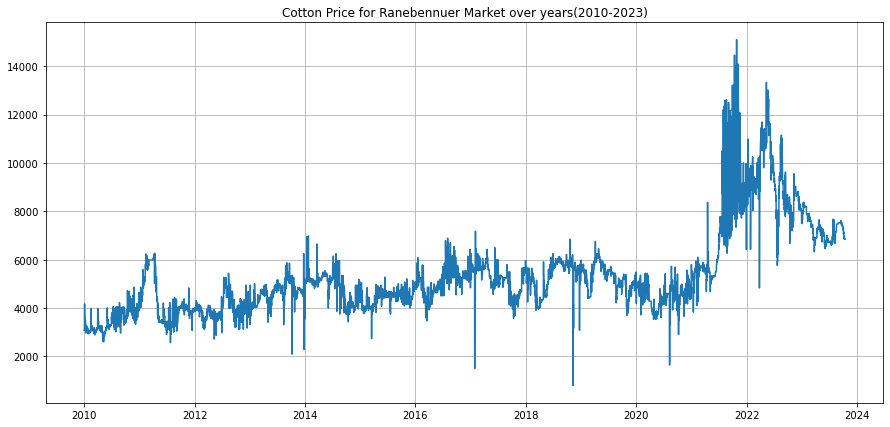

In [2]:
# Visualize

# Read the Excel file into a DataFrame
df = pd.read_csv(r"cotton.csv")
df.set_index('date', inplace=True)

dates = [datetime.datetime.strptime(d, "%Y-%m-%d") for d in df.index]


plt.figure(figsize=(15, 7))
plt.plot(dates,df['kr_price'])
plt.title('Cotton Price for Ranebennuer Market over years(2010-2023)')
plt.grid(True)
plt.show();

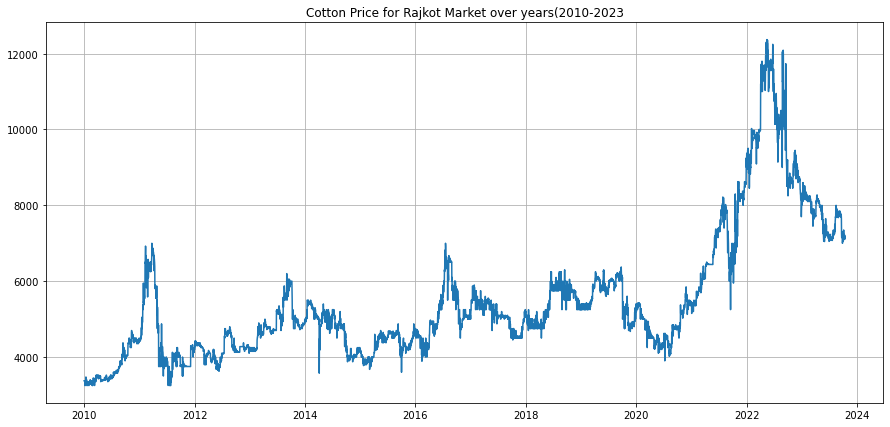

In [3]:
# Visualize

# Read the Excel file into a DataFrame
df = pd.read_csv(r"cotton.csv")
df.set_index('date', inplace=True)

dates = [datetime.datetime.strptime(d, "%Y-%m-%d") for d in df.index]

plt.figure(figsize=(15, 7))
plt.plot(dates, df['rj_price'])
plt.title('Cotton Price for Rajkot Market over years(2010-2023')
plt.grid(True)
plt.show();